In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Flights

In [2]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


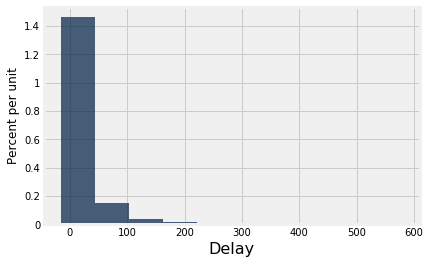

In [3]:
united.hist('Delay')

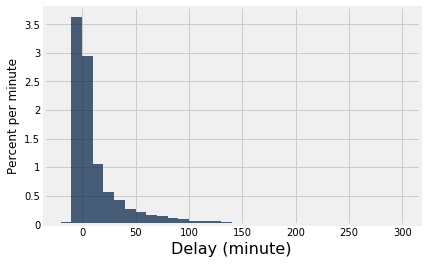

In [5]:
united.hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')

In [8]:
(united
 .where('Delay', are.between(10, 20))
 .num_rows
 / united.num_rows
)

0.10452079566003616

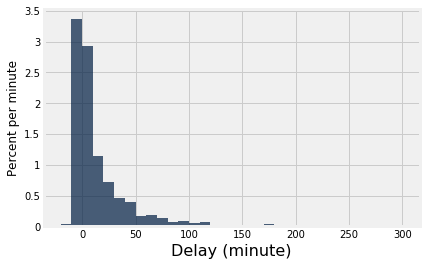

In [17]:
united.sample(1000).hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')

In [21]:
def united_sample_and_hist(n):
    united.sample(n).hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')
    plt.show()

In [23]:
_ = interact(united_sample_and_hist, n=make_array(100, 1000, 10000))

## At Least One 6

Roll a die 4 times. What's P(at least one 6).

In [24]:
1 - (5/6) * (5/6) * (5/6) * (5/6)

0.5177469135802468

In [29]:
rolls = np.arange(1, 51)
at_least_one = Table().with_columns(
    'Roll', rolls,
    'Chance of getting at least one 6', 1 - (5/6) ** rolls
)
at_least_one

Roll,Chance of getting at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


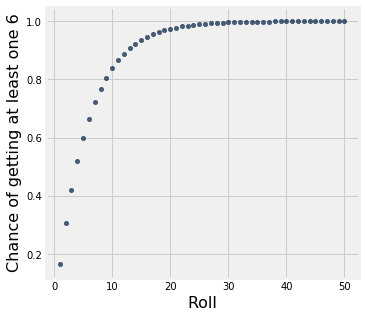

In [30]:
at_least_one.scatter('Roll')

In [32]:
at_least_one.where('Roll', 20)

Roll,Chance of getting at least one 6
20,0.973916


In [63]:
faces = np.arange(1, 7) 
outcomes = np.random.choice(faces, 20)
outcomes

array([2, 3, 4, 3, 4, 1, 5, 3, 2, 5, 3, 4, 1, 4, 2, 1, 2, 3, 5, 5])

In [64]:
np.count_nonzero(outcomes == 6)

0

In [83]:
trials = 1000
success = 0

for i in np.arange(trials):
    outcomes = np.random.choice(faces, 20)
    if np.count_nonzero(outcomes == 6) >= 1:
        success = success + 1

success / trials

0.968

## Estimation

In [87]:
def roll_20(trials):
    success = 0

    for i in np.arange(trials):
        outcomes = np.random.choice(faces, 20)
        if np.count_nonzero(outcomes == 6) >= 1:
            success = success + 1

    return success / trials

estimates = Table(['estimate'])
for i in np.arange(200):
    estimates.append([roll_20(1000)])
estimates

estimate
0.976
0.979
0.968
0.967
0.978
0.974
0.973
0.971
0.978
0.965


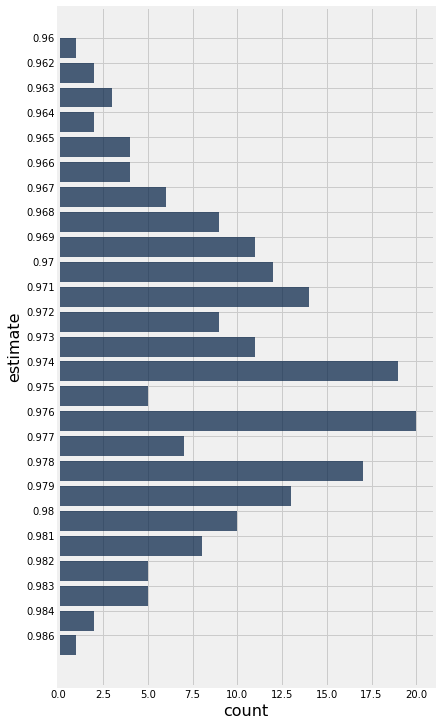

In [88]:
estimates.group(0).barh(0)

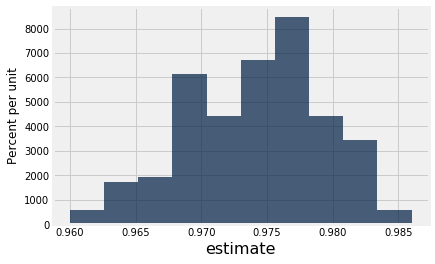

In [89]:
estimates.hist(0)

## Planes

In [90]:
N = 300
serialno = Table().with_column('Serial number', np.arange(N)+1)
serialno

Serial number
1
2
3
4
5
6
7
8
9
10


In [102]:
serialno.sample(30).column(0).max()

265

In [104]:
sample_size = 30
repetitions = 1000

maxes = make_array()

for i in np.arange(repetitions):
    sampled_N = serialno.sample(sample_size).column(0).max()
    maxes = np.append(maxes, sampled_N)

estimates = Table().with_columns(
    'Max serial number', maxes,
)
estimates

Max serial number
300
300
299
297
290
293
292
300
278
296


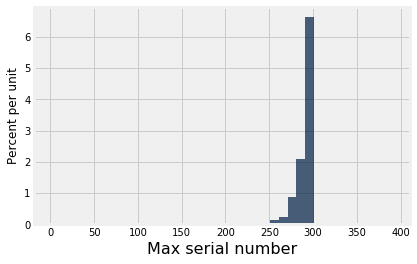

In [106]:
estimates.hist(0, bins=np.arange(1, 400, 10))

In [108]:
sample_size = 30
repetitions = 1000

maxes = make_array()
doubles = make_array()

for i in np.arange(repetitions):
    sample = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, np.max(sample))
    doubles = np.append(doubles, np.average(sample) * 2)

estimates = Table().with_columns(
    'Max serial number', maxes,
    '2 * average', doubles,
)
estimates

Max serial number,2 * average
298,317.4
293,292.467
280,297.2
285,314.2
296,261.4
299,358.667
294,286.267
296,282.067
297,277.6
295,295.467


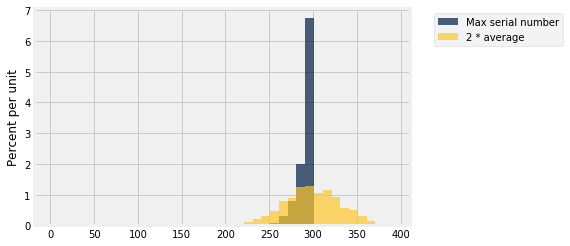

In [109]:
estimates.hist(bins=np.arange(1, 400, 10))